<a href="https://colab.research.google.com/github/edgaracabral/Kaggle_BankMarketing/blob/main/13_Selecao_das_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Bank Marketing Case
## Seleção de Variáveis para Modelagem (*Feature Selection*) - **Sem Dados de Campanha Atual**

Neste fase temos como desafio:

* Selecionar Variáveis que farão parte do modelo
* Criar Analytical Base Tables (ABT) para Treino e Teste
 * Treino - abt_fs01_train.csv
 * Teste - abt_fs01_test.csv

## Framework de Seleção de Variáveis (*Feature Selection*)
No passo anterior de Preparação de Dados, é possível utilizar técnicas de *Feature Engineering* que agrupam as variáveis de forma a explodir as possibilidades de análise.

No caso deste projeto, esta possibilidade não foi explorada, porém caso fosse feita a base a ser analisada poderia conter uma grande gama de *features*. A PoD Academy menciona a possibilidade de gerar-se até 80 mil variáveis. Para possibilitar o trabalho de modelagem, a *Feature Selection* reduziria o conjunto de *Features* para um número menor a ser tratado no próximo passo.

Mantemos o framework de *Feature Selection* como orientado pela PoD Academy para fins ilustrativos, que consiste nos seguintes passos:
- Ler as tabelas criadas no passo **DataPrep** anterior,
- Aplicar um modelo de Aprendizagem dentre as seguintes opções:
 - Decision Tree
 - Gradient Boost
 - Random Forest
- Analisar impacto oferecidos pelas *features*
- Definir um threshold que manterá apenas as *features* mais importantes
- Gerar artefatos para implantação do *feature selection* realizado
 - abt_fs01_train.csv
 - abt_fs01_test.csv

# 1. Leitura dos Dados

## 1.1 Setando o Ambiente
* Google Drive
* Carregar Bibliotecas Utilizadas
* Ir ao folder dos arquivos de DataPrep

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Redirecione para o folder on pod_academy_functions.py is localizado
%cd /content/drive/MyDrive/PoD Academy/modelos/Hackaton_DS_2023/PoD Framework
import pod_academy_functions as pod

/content/drive/MyDrive/PoD Academy/modelos/Hackaton_DS_2023/PoD Framework


In [ ]:
# Armazene o caminho do folder de DataPrep em file_path
file_path = '/content/drive/MyDrive/Kaggle/Bank\ Marketing/12\ data\ prep'

# Vá para o folder de DataPrep
%cd $file_path

/content/drive/MyDrive/Kaggle/Bank Marketing/12 data prep


#2. Trabalhando com a ABT de Treino

## 2.1 Carregando a ABT de Treino

In [ ]:
abt_00 = pd.read_csv('abt_train.csv')
abt_00.shape

(31647, 29)

In [ ]:
abt_00.columns

Index(['Unnamed: 0', 'age', 'balance', 'pdays', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'id', 'target'],
      dtype='object')

## 2.2 Removendo colunas **Unnamed** e **id** da ABT de Treino
contact
day
month
duration
campaign

In [ ]:
# Removendo colunas 'Unnamed' e 'id' da tabela abt_00
# No final deste processo, as tabelas geradas não devem possuir a coluna id
abt_00.drop(axis=1,columns=['Unnamed: 0','id'],inplace=True)
abt_00.shape

(31647, 27)

## 2.3 Aplicando Modelo para identificar importância das variáveis Explicativas
Separamos em variáveis Explicativas (dataframe **X**) e a variável Target (dataframe **y**) e selecionamos o algoritmo que será utilizado.

In [ ]:
X = abt_00.drop(axis=1,columns='target')
y = abt_00.target

print(X.shape)
print(y.shape)

# Treinar modelo com algoritmo Random Forest (Calma, não precisa focar no modelo neste momento)
#clf = RandomForestClassifier() # troque aqui qual classificador quer utilizar: GradientBoostingClassifier, DecisionTreeClassifier
clf = DecisionTreeClassifier() # troque aqui qual classificador quer utilizar: GradientBoostingClassifier, DecisionTreeClassifier
clf.fit(X, y)

(31647, 26)
(31647,)


DecisionTreeClassifier()

Executamos o algorítmo para identificar a importância das variáveis Explicativas face a variável Target.

Número de features selecionadas:  25


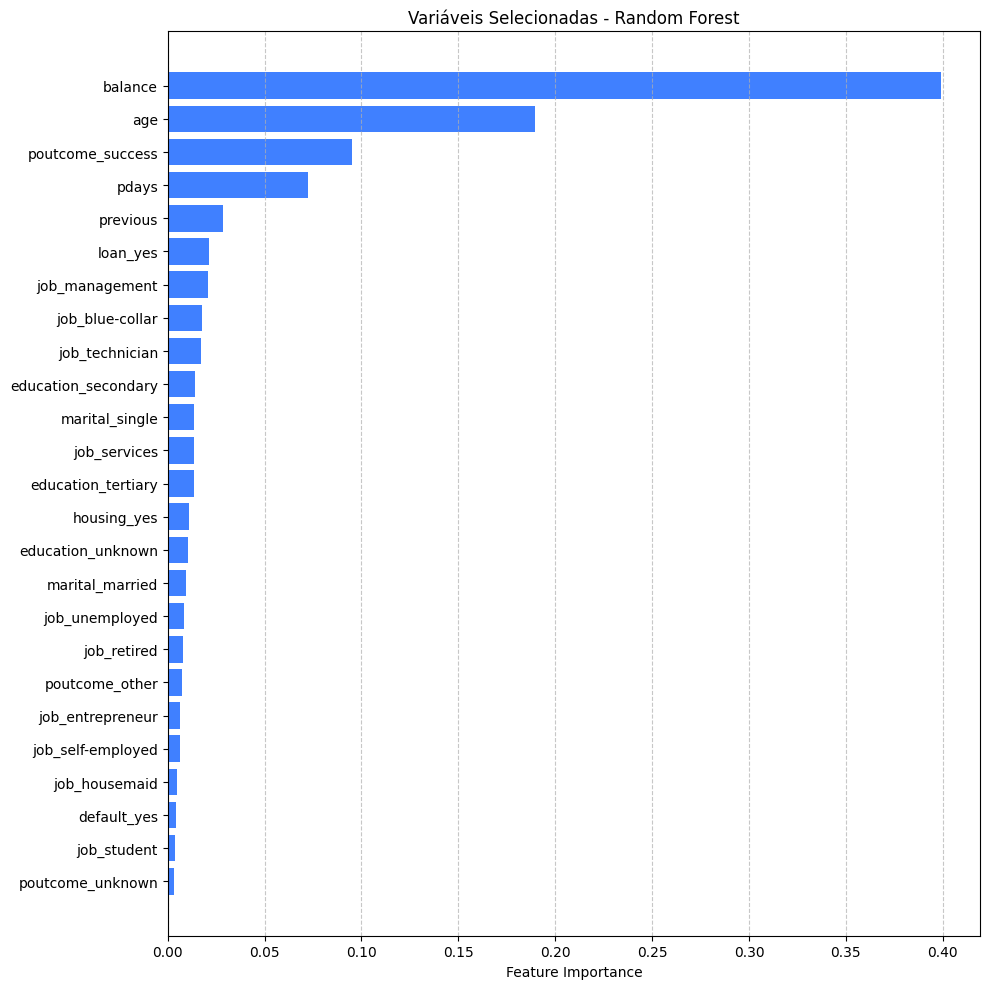

In [ ]:
# Obter importância das variáveis
feature_importances = clf.feature_importances_
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=False)

# Estabelecer um limite de corte, por exemplo, x% da importância máxima
cutoff_maximp = 0.005

cutoff = cutoff_maximp * feature_importances.max()

# Selecionar variáveis acima do corte
selected_features = X.columns[feature_importances > cutoff].tolist()
print('Número de features selecionadas: ',len(selected_features))

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=True)

# Filtrar o DataFrame para apenas as features acima do corte
selected_features_df = features[features['Importance'] > cutoff]

# Ajusta o tamanho da figura com base no número de features selecionadas
plt.figure(figsize=(10, len(selected_features_df)*0.4))

# Plota as features selecionadas
plt.barh(selected_features_df['Feature'], selected_features_df['Importance'], color=(0.25, 0.5, 1))
plt.xlabel("Feature Importance")
plt.title("Variáveis Selecionadas - Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 2.4 Salvar Artefato .pkl de *Features* selecionadas
O arquivo `prd_list_features_hktn.pkl` contém as *features* selecionadas neste framework.

In [ ]:
# Salvar a lista em um arquivo .pkl
import pickle
with open('prd_list_features_hktn.pkl', 'wb') as f:
    pickle.dump(selected_features, f)

## 2.5 Carregando o Artefato .pkl de *Features* selecionadas
Para verificar se artefato foi devidamente salvo, pois será usado caso coloquemos em Produção.

Comparar com o histograma gerado no passo 2.3 acima.

In [ ]:
# Carregar a lista do arquivo .pkl
with open('prd_list_features_hktn.pkl', 'rb') as f:
    loaded_lista = pickle.load(f)

print(loaded_lista)

['age', 'balance', 'pdays', 'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes', 'loan_yes', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


## 2.6 Cria dataframe **abt_01** apenas com Features selecionadas e Target

In [ ]:
lista_features = loaded_lista + ['target']
abt_01 = abt_00[lista_features]
abt_01.shape

(31647, 26)

In [ ]:
abt_01.head()

,age,balance,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,poutcome_other,poutcome_success,poutcome_unknown,target
0,-0.464799,-0.456680,-1.138504e-15,-0.240512,-0.526225,-0.184151,-0.168627,-0.512000,-0.230455,-0.191898,...,-1.033257,1.564172,-0.208793,-0.140544,-1.119132,-0.437178,-0.209122,-0.185066,0.472706,0
1,1.416343,-0.390831,-1.138504e-15,-0.240512,-0.526225,5.430326,-0.168627,-0.512000,-0.230455,-0.191898,...,0.967813,-0.639316,-0.208793,-0.140544,-1.119132,-0.437178,-0.209122,-0.185066,0.472706,0
2,0.475772,-0.456680,-1.138504e-15,-0.240512,1.900329,-0.184151,-0.168627,-0.512000,-0.230455,-0.191898,...,0.967813,-0.639316,-0.208793,-0.140544,0.893550,-0.437178,-0.209122,-0.185066,0.472706,0
3,0.005486,0.694328,-2.127233e+00,1.812098,-0.526225,-0.184151,-0.168627,1.953125,-0.230455,-0.191898,...,-1.033257,1.564172,-0.208793,-0.140544,-1.119132,-0.437178,-0.209122,5.403473,-2.115481,0
4,-0.276685,-0.456680,-1.138504e-15,-0.240512,1.900329,-0.184151,-0.168627,-0.512000,-0.230455,-0.191898,...,0.967813,-0.639316,-0.208793,-0.140544,0.893550,-0.437178,-0.209122,-0.185066,0.472706,0


# 3. Trabalhando com a ABT de Teste

## 3.1 Carregando a ABT de Treino

In [ ]:
abt_test = pd.read_csv('abt_test.csv')
abt_test.drop(axis=1,columns=['Unnamed: 0','id'],inplace=True)
abt_test.shape

(13564, 27)

## 3.2 Cria dataframe **abt_01_test** apenas com Features selecionadas e Target

In [ ]:
lista_features = loaded_lista + ['target']
abt_01_test = abt_test[lista_features]
abt_01_test.shape

(13564, 26)

In [ ]:
abt_01_test.head()

,age,balance,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,poutcome_other,poutcome_success,poutcome_unknown,target
0,-0.087221,-0.248404,0.008043,-0.289532,1.930746,-0.185029,-0.166294,-0.519766,-0.227594,-0.186303,...,0.988419,-0.660382,-0.202638,-0.122953,0.894768,-0.435928,-0.198462,-0.187992,0.472084,0
1,0.573919,0.709957,0.008043,-0.289532,-0.517935,-0.185029,-0.166294,-0.519766,-0.227594,-0.186303,...,0.988419,-0.660382,-0.202638,-0.122953,-1.117608,-0.435928,-0.198462,-0.187992,0.472084,0
2,-1.503949,-0.261541,0.008043,-0.289532,-0.517935,-0.185029,-0.166294,-0.519766,-0.227594,-0.186303,...,-1.011717,1.514276,-0.202638,-0.122953,0.894768,-0.435928,-0.198462,-0.187992,0.472084,0
3,0.101676,0.124744,2.327377,0.220761,-0.517935,-0.185029,-0.166294,1.923944,-0.227594,-0.186303,...,-1.011717,1.514276,-0.202638,-0.122953,-1.117608,-0.435928,-0.198462,-0.187992,-2.118267,0
4,1.423956,-0.361943,0.008043,-0.289532,-0.517935,-0.185029,-0.166294,1.923944,-0.227594,-0.186303,...,-1.011717,1.514276,-0.202638,-0.122953,-1.117608,2.293956,-0.198462,-0.187992,0.472084,0


# 4. Salva ABTs de Treino e Teste com as *Features Selecionadas*

In [ ]:
# Salvando abt para treinamento dos modelos

abt_01.to_csv('abt_fs01_train.csv')
abt_01_test.to_csv('abt_fs01_test.csv')